
# Objectives:

The primary objective of this machine learning model is to predict the **Yield (KgPerHa)** of oilseed crops in Maharashtra, India. This prediction is based on various environmental and agricultural factors, including:

*   **Climatic Conditions:** Rainfall, temperature (min/max), humidity.
*   **Soil Properties:** Soil pH, organic carbon content, nutrient levels (Nitrogen, Phosphorus, Potassium), soil type.
*   **Farming Practices:** Area planted, irrigation type, pest incidence, fertilizer application (Urea, DAP, Potash).
*   **Temporal and Categorical Factors:** Year, Season, District, and Crop type.

By accurately predicting crop yield, this model aims to provide valuable insights for:

*   **Agricultural Planning:** Assisting farmers and policymakers in making informed decisions about crop management, resource allocation, and yield optimization.
*   **Resource Management:** Helping to predict the impact of different environmental conditions and farming practices on yield, facilitating better resource utilization (e.g., water, fertilizers).
*   **Risk Assessment:** Identifying factors that significantly influence yield and potentially predicting areas or conditions prone to lower yields.

Ultimately, this project seeks to contribute to improving agricultural productivity and sustainability in the region.

#Step1: importing the libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV


#Step2: Loading the dataset

In [ ]:
#LOAD DATASET
df = pd.read_csv('Maharashtra_Oilseed_ML_Dataset.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()


Dataset loaded successfully!
Shape: (1920, 22)


,Year,Season,District,Crop,Area_Hectares,Production_Tonnes,Yield_KgPerHa,Rainfall_mm,Min_Temperature_C,Max_Temperature_C,...,Organic_Carbon_Percent,Nitrogen_KgPerHa,Phosphorus_KgPerHa,Potassium_KgPerHa,Soil_Type,Irrigation_Type,Pest_Incidence_Score,Urea_Applied_KgPerHa,DAP_Applied_KgPerHa,Potash_Applied_KgPerHa
0,2015,Kharif,Ahmednagar,Soybean,1577,2117,1343,514.29,23.25,30.45,...,0.30,348.44,28.52,217.86,Black Soil,Rainfed,2,111.19,39.76,37.53
1,2015,Kharif,Akola,Soybean,1966,2966,1509,944.25,22.25,30.11,...,0.65,153.19,16.93,158.56,Red Soil,Irrigated,2,140.93,48.11,59.75
2,2015,Kharif,Amravati,Soybean,4383,6329,1444,1115.86,22.99,37.37,...,0.34,215.07,21.66,163.42,Laterite Soil,Rainfed,3,110.70,49.32,37.78
3,2015,Kharif,Beed,Soybean,5091,7030,1381,884.77,24.63,35.21,...,0.70,169.08,21.12,227.01,Red Soil,Rainfed,5,138.72,63.06,27.18
4,2015,Kharif,Bhandara,Soybean,3426,4008,1170,561.38,24.48,33.80,...,0.43,270.88,26.20,152.49,Alluvial Soil,Rainfed,2,66.12,95.08,68.49


#Step 3: Exploratory Data Analysis(EDA)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1920 non-null   int64  
 1   Season                  1920 non-null   object 
 2   District                1920 non-null   object 
 3   Crop                    1920 non-null   object 
 4   Area_Hectares           1920 non-null   int64  
 5   Production_Tonnes       1920 non-null   int64  
 6   Yield_KgPerHa           1920 non-null   int64  
 7   Rainfall_mm             1920 non-null   float64
 8   Min_Temperature_C       1920 non-null   float64
 9   Max_Temperature_C       1920 non-null   float64
 10  Humidity_Percent        1920 non-null   float64
 11  Soil_pH                 1920 non-null   float64
 12  Organic_Carbon_Percent  1920 non-null   float64
 13  Nitrogen_KgPerHa        1920 non-null   float64
 14  Phosphorus_KgPerHa      1920 non-null   

In [ ]:
df.describe()

,Year,Area_Hectares,Production_Tonnes,Yield_KgPerHa,Rainfall_mm,Min_Temperature_C,Max_Temperature_C,Humidity_Percent,Soil_pH,Organic_Carbon_Percent,Nitrogen_KgPerHa,Phosphorus_KgPerHa,Potassium_KgPerHa,Pest_Incidence_Score,Urea_Applied_KgPerHa,DAP_Applied_KgPerHa,Potash_Applied_KgPerHa
count,1920.00000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.00000,1920.000000,1920.000000
mean,2019.50000,1600.772396,2133.546875,1161.055208,481.822828,18.193969,31.325365,63.983016,6.993375,0.748641,252.762047,24.768901,199.475719,2.477604,99.74250,65.176083,50.107240
std,2.87303,1117.868181,1917.313959,529.684544,352.374323,4.677167,3.544208,11.623907,0.577555,0.262390,57.502220,8.574294,46.559981,1.703847,29.10541,20.163086,17.136686
min,2015.00000,94.000000,30.000000,272.000000,50.230000,10.000000,25.010000,40.010000,6.000000,0.300000,150.000000,10.030000,120.010000,0.000000,50.03000,30.010000,20.080000
25%,2017.00000,746.000000,561.750000,717.000000,172.280000,13.845000,28.537500,55.887500,6.510000,0.520000,203.482500,17.330000,158.732500,1.000000,74.04250,48.005000,35.547500
50%,2019.50000,1361.000000,1525.000000,1094.000000,350.410000,19.005000,31.140000,64.585000,6.980000,0.750000,253.270000,24.640000,199.770000,2.000000,100.15000,65.305000,49.895000
75%,2022.00000,2157.250000,3202.250000,1565.500000,776.355000,22.470000,34.117500,72.492500,7.490000,0.970000,302.940000,32.105000,240.052500,4.000000,123.95000,82.672500,65.102500
max,2024.00000,6199.000000,10676.000000,2608.000000,1199.170000,24.990000,38.000000,84.990000,8.000000,1.200000,349.980000,39.970000,279.920000,5.000000,149.97000,99.980000,79.990000


In [ ]:
# Average Yield by Categorical Features
categorical_features = ['Crop', 'Season', 'District', 'Soil_Type', 'Irrigation_Type']

for col in categorical_features:
    grouped_data = df[[col, 'Yield_KgPerHa']].groupby(col).mean()
    print(f"Mean Yield_KgPerHa by {col}:")
    display(grouped_data)
    print()

Mean Yield_KgPerHa by Crop:


,Yield_KgPerHa
Crop,
Groundnut,1754.950000
Safflower,766.540625
Sesame,484.100000
Soybean,1238.100000
Sunflower,967.690625



Mean Yield_KgPerHa by Season:


,Yield_KgPerHa
Season,
Kharif,1157.227083
Rabi,1164.883333



Mean Yield_KgPerHa by District:


,Yield_KgPerHa
District,
Ahmednagar,1187.866667
Akola,1220.483333
Amravati,1212.166667
Beed,1178.966667
Bhandara,1174.700000
Buldhana,1167.100000
Chandrapur,1117.183333
Dhule,1147.183333
Gadchiroli,1118.650000



Mean Yield_KgPerHa by Soil_Type:


,Yield_KgPerHa
Soil_Type,
Alluvial Soil,1191.634921
Black Soil,1164.389848
Laterite Soil,1160.206642
Red Soil,1142.456842



Mean Yield_KgPerHa by Irrigation_Type:


,Yield_KgPerHa
Irrigation_Type,
Drip,1139.744681
Irrigated,1182.342246
Rainfed,1161.402766
Sprinkler,1139.378109


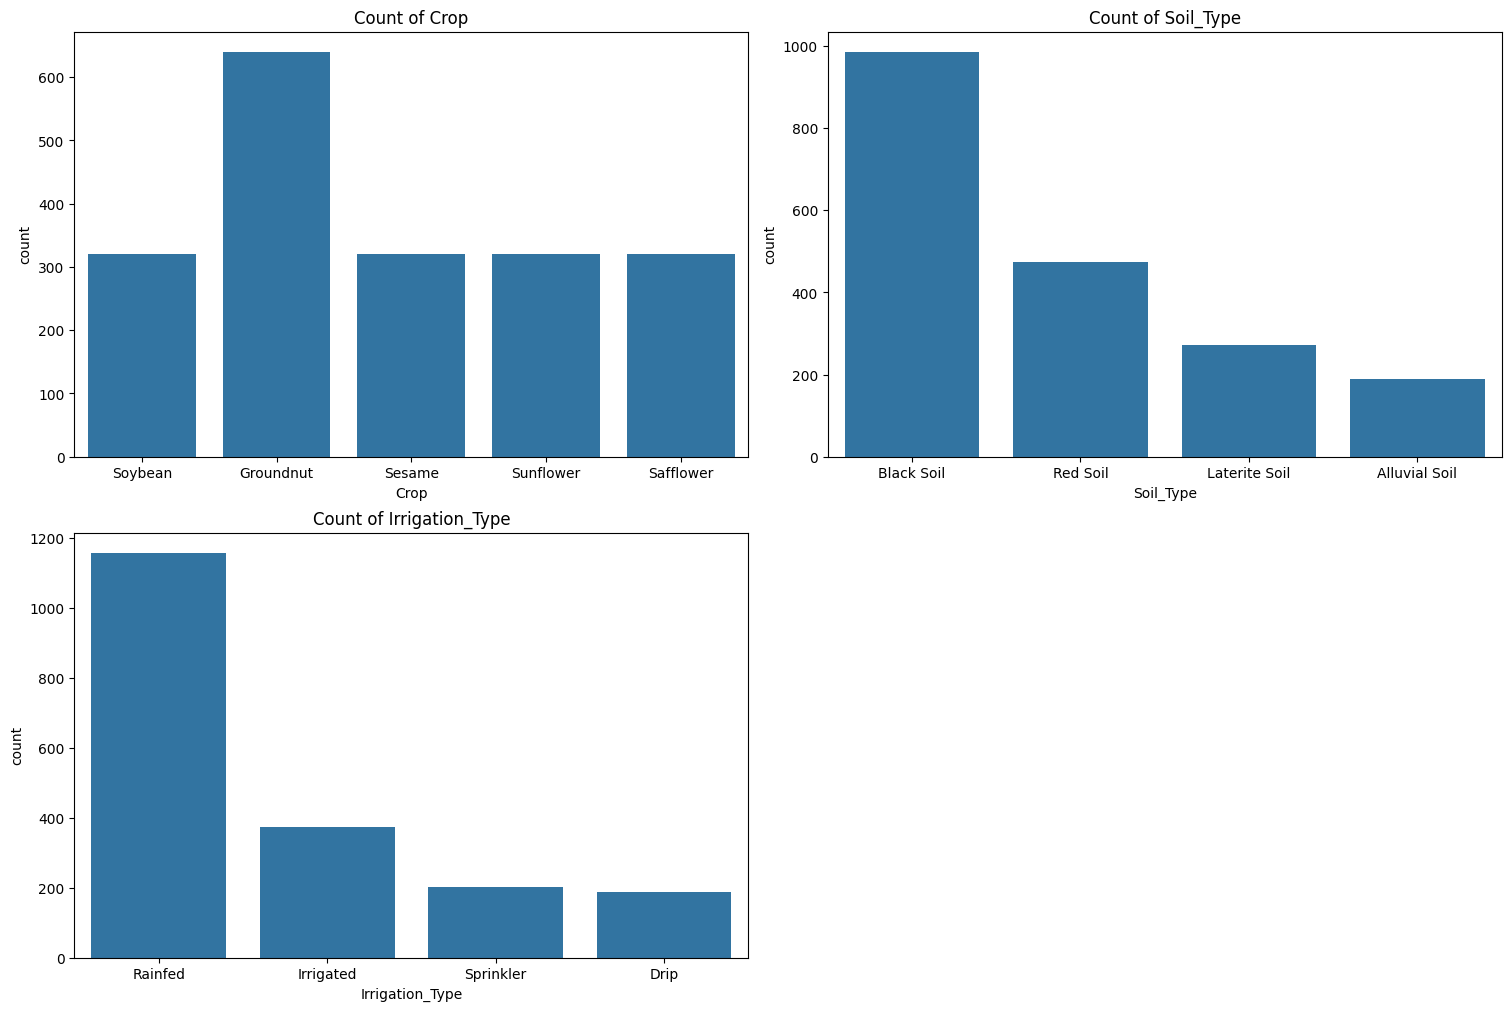

In [ ]:
#Analyzing Average Yield by Categorical Features

categorical_features = ['Crop', 'Soil_Type', 'Irrigation_Type'] # Removed 'Season' and 'District'

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # Adjusted subplot grid size
fig.set_constrained_layout(True) # Use constrained_layout
axes = axes.flatten() # Flatten axes for easy iteration

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i]) # Pass the axis to seaborn
    axes[i].set_title(f'Count of {col}') # Add titles to subplots

# Remove any unused axes
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.show()

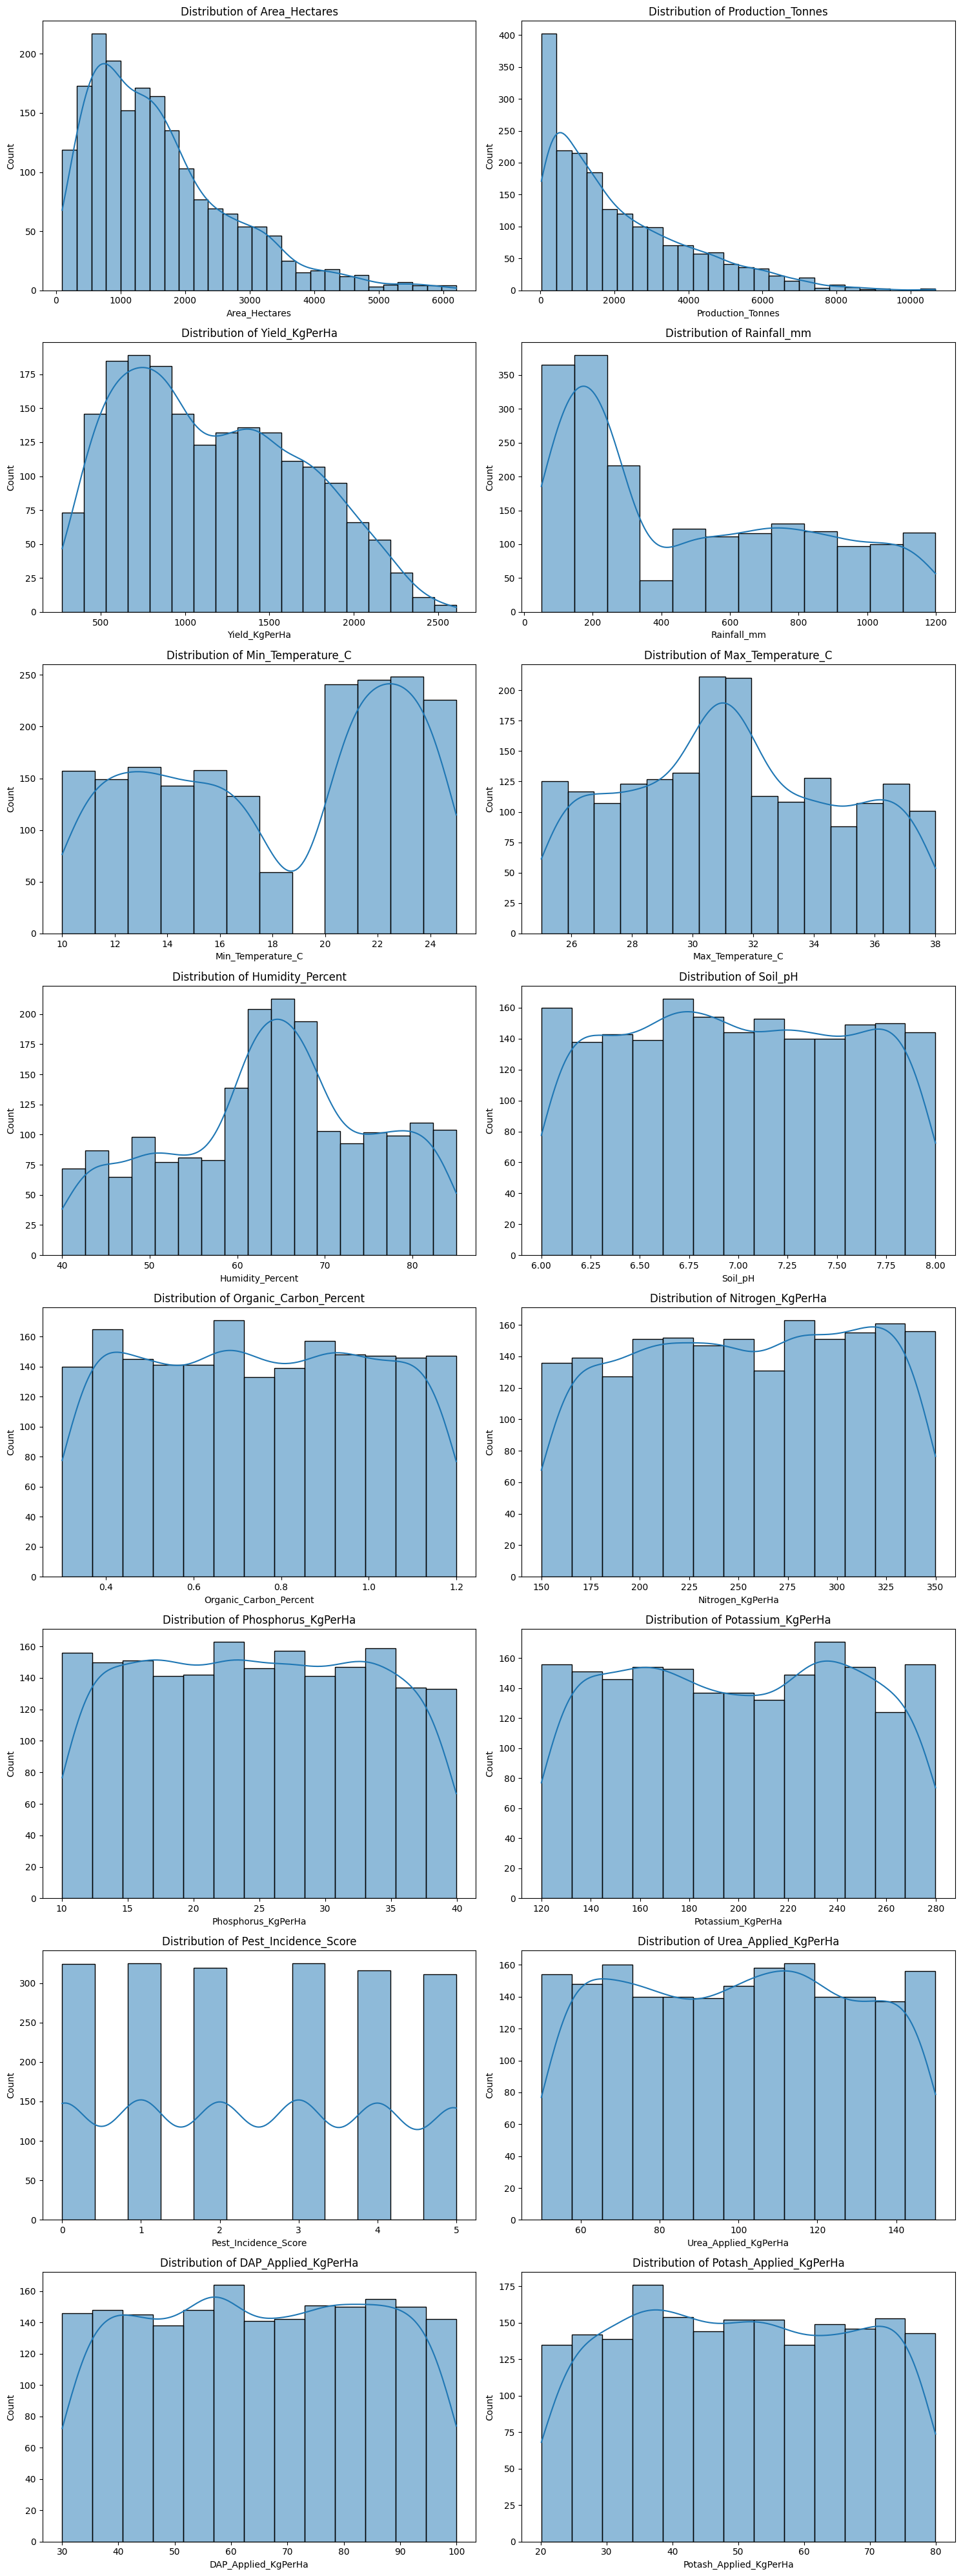

In [ ]:
#Distribution of Numerical Features


numeric_cols = ['Area_Hectares', 'Production_Tonnes', 'Yield_KgPerHa', 'Rainfall_mm',
                'Min_Temperature_C', 'Max_Temperature_C', 'Humidity_Percent', 'Soil_pH',
                'Organic_Carbon_Percent', 'Nitrogen_KgPerHa', 'Phosphorus_KgPerHa',
                'Potassium_KgPerHa', 'Pest_Incidence_Score', 'Urea_Applied_KgPerHa',
                'DAP_Applied_KgPerHa', 'Potash_Applied_KgPerHa']

n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2 # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
axes = axes.flatten() # Flatten axes for easy iteration

for i, col in enumerate(numeric_cols):
    if i < len(axes): # Ensure we don't try to plot on a non-existent axis
        sns.histplot(data=df, x=col, kde=True, ax=axes[i]) # Pass the axis to seaborn
        axes[i].set_title(f'Distribution of {col}') # Add titles to subplots

# Remove any unused axes
for j in range(n_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Step 4: Feature Engineering

In [ ]:
#creation of new features and prepare categorical data for modeling.

df_processed = df.copy()

df_processed['Temp_Range'] = df_processed['Max_Temperature_C'] - df_processed['Min_Temperature_C']
df_processed['NPK_Total'] = (df_processed['Nitrogen_KgPerHa'] +
                              df_processed['Phosphorus_KgPerHa'] +
                              df_processed['Potassium_KgPerHa'])
df_processed['Fertilizer_Total'] = (df_processed['Urea_Applied_KgPerHa'] +
                                     df_processed['DAP_Applied_KgPerHa'] +
                                     df_processed['Potash_Applied_KgPerHa'])

categorical_features = ['Crop', 'Season', 'District', 'Soil_Type', 'Irrigation_Type']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_processed[col + '_Encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le


In [ ]:
# Data Preparation: Feature Selection, Splitting, and Scaling

feature_cols = [
    'Year', 'Crop_Encoded', 'Season_Encoded', 'District_Encoded',
    'Area_Hectares', 'Rainfall_mm', 'Min_Temperature_C', 'Max_Temperature_C',
    'Humidity_Percent', 'Soil_pH', 'Organic_Carbon_Percent',
    'Nitrogen_KgPerHa', 'Phosphorus_KgPerHa', 'Potassium_KgPerHa',
    'Soil_Type_Encoded', 'Irrigation_Type_Encoded', 'Pest_Incidence_Score',
    'Urea_Applied_KgPerHa', 'DAP_Applied_KgPerHa', 'Potash_Applied_KgPerHa',
    'Temp_Range', 'NPK_Total', 'Fertilizer_Total'
]

X = df_processed[feature_cols]
y = df_processed['Yield_KgPerHa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1536, 23)
Test set size: (384, 23)


In [ ]:
df_processed.head()

,Year,Season,District,Crop,Area_Hectares,Production_Tonnes,Yield_KgPerHa,Rainfall_mm,Min_Temperature_C,Max_Temperature_C,...,DAP_Applied_KgPerHa,Potash_Applied_KgPerHa,Temp_Range,NPK_Total,Fertilizer_Total,Crop_Encoded,Season_Encoded,District_Encoded,Soil_Type_Encoded,Irrigation_Type_Encoded
0,2015,Kharif,Ahmednagar,Soybean,1577,2117,1343,514.29,23.25,30.45,...,39.76,37.53,7.20,594.82,188.48,3,0,0,1,2
1,2015,Kharif,Akola,Soybean,1966,2966,1509,944.25,22.25,30.11,...,48.11,59.75,7.86,328.68,248.79,3,0,1,3,1
2,2015,Kharif,Amravati,Soybean,4383,6329,1444,1115.86,22.99,37.37,...,49.32,37.78,14.38,400.15,197.80,3,0,2,2,2
3,2015,Kharif,Beed,Soybean,5091,7030,1381,884.77,24.63,35.21,...,63.06,27.18,10.58,417.21,228.96,3,0,3,3,2
4,2015,Kharif,Bhandara,Soybean,3426,4008,1170,561.38,24.48,33.80,...,95.08,68.49,9.32,449.57,229.69,3,0,4,0,2


# Step 5: Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [6, 8, 10],
    'num_leaves': [20, 30, 40],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_samples': [20, 30, 40],
    'reg_alpha': [0.1, 0.3, 0.5],
    'reg_lambda': [0.2, 0.4, 0.6]
}

print("Defined Hyperparameter Grid:")
print(param_grid)

Defined Hyperparameter Grid:
{'n_estimators': [500, 1000, 1500], 'learning_rate': [0.01, 0.02, 0.05], 'max_depth': [6, 8, 10], 'num_leaves': [20, 30, 40], 'subsample': [0.8, 0.9, 1.0], 'colsample_bytree': [0.8, 0.9, 1.0], 'min_child_samples': [20, 30, 40], 'reg_alpha': [0.1, 0.3, 0.5], 'reg_lambda': [0.2, 0.4, 0.6]}


In [ ]:
lgbm_base = LGBMRegressor(random_state=42, force_col_wise=True, verbose=-1)


In [ ]:
random_search = RandomizedSearchCV(
    estimator=lgbm_base,
    param_distributions=param_grid,
    n_iter=30,                # Number of random combinations to try
    scoring='r2',             # R² metric for regression
    cv=5,                     # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(force_col_wise=True, random_state=42,
                                           verbose=-1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.02, 0.05],
                                        'max_depth': [6, 8, 10],
                                        'min_child_samples': [20, 30, 40],
                                        'n_estimators': [500, 1000, 1500],
                                        'num_leaves': [20, 30, 40],
                                        'reg_alpha': [0.1, 0.3, 0.5],
                                        'reg_lambda': [0.2, 0.4, 0.6],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [48]:
print("Best Parameters Found:")
print(random_search.best_params_)
print(f"Best CV R² Score: {random_search.best_score_:.4f}")

Best Parameters Found:
{'subsample': 0.9, 'reg_lambda': 0.4, 'reg_alpha': 0.3, 'num_leaves': 30, 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best CV R² Score: 0.8067


In [42]:
# Install Optuna if you haven't already
!pip install optuna -qq

import optuna
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import warnings

# Suppress LightGBM warnings during tuning
warnings.filterwarnings("ignore", message=".*The objective has been evaluated down to .*")

# Define the objective function for Optuna
def objective(trial):
    """Defines the objective function for Optuna to maximize (cross-validation R2)."""
    lgbm_params = {
        'objective': 'regression_l1', # MAE objective, often robust
        'metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 60), # Increased range
        'max_depth': trial.suggest_int('max_depth', 5, 15), # Increased range
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True), # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True), # L2 regularization
        'random_state': 42,
        'n_jobs': -1, # Use all available cores
        'verbose': -1, # Suppress verbose output
        'force_col_wise': True
    }

    model = LGBMRegressor(**lgbm_params)

    # Perform cross-validation
    # Using X and y (full dataset) for CV as it's standard practice in tuning
    # Ensure X and y are defined and scaled appropriately before running this cell
    try:
        # Assume X_scaled (full scaled dataset) and y (target) are available
        # If not, you might need to scale the full X here or ensure previous cells were run
        cv_scores = cross_val_score(model, X_train_scaled, y_train,
                                    cv=3, scoring='r2', n_jobs=-1)
        return cv_scores.mean()
    except NameError:
        print("Error: X_train_scaled or y_train not found. Please run data preparation cells.")
        raise optuna.exceptions.TrialPruned() # Prune trial if data is missing


# Create a study object and specify the direction (maximize R2)
# 'tpe' is the Tree-structured Parzen Estimator sampler (Bayesian Optimization)
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))

# Run the optimization
# n_trials specifies the number of hyperparameter combinations to try
print("Running Bayesian Optimization with Optuna...")
study.optimize(objective, n_trials=50) # Adjust n_trials as needed

# Print the best trial and its parameters
print("\nBest trial:")
print(f"  Value (mean CV R2): {study.best_trial.value:.4f}")
print("  Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# You can now use study.best_trial.params to train your final model
best_params = study.best_trial.params

[I 2025-10-26 12:25:35,010] A new study created in memory with name: no-name-e68ee13e-9609-4962-8ae9-03068c6e1e65


Running Bayesian Optimization with Optuna...


[I 2025-10-26 12:25:57,768] Trial 0 finished with value: 0.7758506545557049 and parameters: {'n_estimators': 1062, 'learning_rate': 0.08927180304353628, 'num_leaves': 50, 'max_depth': 11, 'min_child_samples': 16, 'subsample': 0.662397808134481, 'colsample_bytree': 0.6232334448672797, 'reg_alpha': 0.08499808989182997, 'reg_lambda': 0.0006440507553993703}. Best is trial 0 with value: 0.7758506545557049.
[I 2025-10-26 12:26:32,032] Trial 1 finished with value: 0.7911675431897818 and parameters: {'n_estimators': 1562, 'learning_rate': 0.010485387725194618, 'num_leaves': 59, 'max_depth': 14, 'min_child_samples': 18, 'subsample': 0.6727299868828402, 'colsample_bytree': 0.6733618039413735, 'reg_alpha': 2.716051144654844e-06, 'reg_lambda': 0.00015777981883364995}. Best is trial 1 with value: 0.7911675431897818.
[I 2025-10-26 12:26:43,062] Trial 2 finished with value: 0.7993088840336716 and parameters: {'n_estimators': 1148, 'learning_rate': 0.019553708662745254, 'num_leaves': 45, 'max_depth': 


Best trial:
  Value (mean CV R2): 0.8037
  Params: 
    n_estimators: 500
    learning_rate: 0.011037024008106223
    num_leaves: 27
    max_depth: 7
    min_child_samples: 49
    subsample: 0.8614187365304523
    colsample_bytree: 0.8501913410998092
    reg_alpha: 1.3767884945287468e-08
    reg_lambda: 3.1606809353620855e-06


# Step 6: MODEL TRAINING - LIGHTGBM

##Train Model with optuna Best Parameters

In [57]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor, early_stopping, log_evaluation

# ✅ Updated Model using Best Parameters from Optuna output
# Using the parameters provided by the user from the Optuna best trial output
lgbm_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.011037024008106223,
    max_depth=7,
    num_leaves=27,
    subsample=0.8614187365304523,
    colsample_bytree=0.8501913410998092,
    min_child_samples=49,
    reg_alpha=1.3767884945287468e-08,
    reg_lambda=3.1606809353620855e-06,
    random_state=42,
    verbose=-1,
    force_col_wise=True
)

# Train model with validation monitoring
lgbm_model.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric='rmse',
    callbacks=[
        early_stopping(stopping_rounds=100, verbose=False),
        log_evaluation(period=0)
    ]
)

# Predict
# Ensure X_train_scaled and X_test_scaled are DataFrames with feature names if needed by predict
# In this case, LGBMRegressor can handle NumPy arrays, so converting is not strictly necessary
y_pred_train = lgbm_model.predict(X_train_scaled)
y_pred_test = lgbm_model.predict(X_test_scaled)

# Evaluate performance and store in variables with _op suffix
train_r2 = r2_score(y_train, y_pred_train)
test_r2_op = r2_score(y_test, y_pred_test) # Stored with _op suffix
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse_op = np.sqrt(mean_squared_error(y_test, y_pred_test)) # Stored with _op suffix
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae_op = mean_absolute_error(y_test, y_pred_test) # Stored with _op suffix


print(f"\nTraining R²: {train_r2:.4f}")
print(f"Testing R² (Optuna): {test_r2_op:.4f}") # Updated print statement
print(f"Training RMSE: {train_rmse:.2f} kg/ha")
print(f"Testing RMSE (Optuna): {test_rmse_op:.2f} kg/ha") # Updated print statement
print(f"Training MAE: {train_mae:.2f} kg/ha")
print(f"Testing MAE (Optuna): {test_mae_op:.2f} kg/ha") # Updated print statement


Training R²: 0.9006
Testing R² (Optuna): 0.8203
Training RMSE: 167.40 kg/ha
Testing RMSE (Optuna): 222.15 kg/ha
Training MAE: 132.37 kg/ha
Testing MAE (Optuna): 173.62 kg/ha


## Train Model with RandomizedSearchCV Best Parameters

In [54]:
# Best parameters found by RandomizedSearchCV (from previous output)
best_params_random_search = {
    'subsample': 0.9,
    'reg_lambda': 0.4,
    'reg_alpha': 0.3,
    'num_leaves': 30,
    'n_estimators': 500,
    'min_child_samples': 20,
    'max_depth': 8,
    'learning_rate': 0.01,
    'colsample_bytree': 0.8
}

# Create a new LightGBM model with the best parameters from RandomizedSearchCV
lgbm_model_rs = LGBMRegressor(
    **best_params_random_search,
    random_state=42,
    verbose=-1,
    force_col_wise=True
)

# Train the model on the scaled training data
lgbm_model_rs.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test_rs = lgbm_model_rs.predict(X_test_scaled)

# Evaluate performance on the test set
test_r2_rs = r2_score(y_test, y_pred_test_rs)
test_rmse_rs = np.sqrt(mean_squared_error(y_test, y_pred_test_rs))
test_mae_rs = mean_absolute_error(y_test, y_pred_test_rs)

# Print the evaluation metrics
print("\nPerformance of the model trained with RandomizedSearchCV best parameters:")
print(f"Testing R²: {test_r2_rs:.4f}")
print(f"Testing RMSE: {test_rmse_rs:.2f} kg/ha")
print(f"Testing MAE: {test_mae_rs:.2f} kg/ha")

# Update the performance comparison DataFrame with the RandomizedSearchCV results
# Ensure the variables test_r2, test_rmse, test_mae used in the comparison table cell (GV8wCK2vmeIQ)
# are updated or defined here if they are not globally available.
# For consistency, let's redefine them with the RS results before the comparison cell.
test_r2 = test_r2_rs
test_rmse = test_rmse_rs
test_mae = test_mae_rs


Performance of the model trained with RandomizedSearchCV best parameters:
Testing R²: 0.8140
Testing RMSE: 226.01 kg/ha
Testing MAE: 177.12 kg/ha


#Step 7: Evaluation and Visualization

In [60]:
# Compare model performance using RandomizedSearchCV and Optuna

# From the RandomizedSearchCV section: test_r2_rs, test_rmse_rs, test_mae_rs
# From the Optuna section: test_r2_optuna, test_rmse_optuna, test_mae_optuna

# Create a dictionary to hold the metrics
performance_comparison_data = {
    'Metric': ['R²', 'RMSE (kg/ha)', 'MAE (kg/ha)'],
    'RandomizedSearchCV': [test_r2_rs, test_rmse_rs, test_mae_rs],
    'Optuna': [test_r2_op, test_rmse_op, test_mae_op]
}

# Create a pandas DataFrame from the dictionary
performance_comparison_df = pd.DataFrame(performance_comparison_data)

# Display the comparison table
print("Model Performance Comparison (Test Set):")
display(performance_comparison_df)

Model Performance Comparison (Test Set):


,Metric,RandomizedSearchCV,Optuna
0,R²,0.814003,0.820306
1,RMSE (kg/ha),226.008722,222.146243
2,MAE (kg/ha),177.118405,173.615373


In [78]:
print("Performance Metrics of Tuned Model (Optuna):")
print(f"Testing R²: {test_r2_op:.4f}")
print(f"Testing RMSE: {test_rmse_op:.2f} kg/ha")
print(f"Testing MAE: {test_mae_op:.2f} kg/ha")

Performance Metrics of Tuned Model (Optuna):
Testing R²: 0.8203
Testing RMSE: 222.15 kg/ha
Testing MAE: 173.62 kg/ha


In [79]:
# Create a DataFrame for the evaluation metrics
metrics_data = {
    'Metric': ['R²', 'RMSE (kg/ha)', 'MAE (kg/ha)'],   # Names of the metrics calculated
    'Training': [train_r2, train_rmse, train_mae],     # Corresponding values for the training set
    'Testing': [test_r2, test_rmse, test_mae]          # Corresponding values for the testing set
}
metrics_df = pd.DataFrame(metrics_data)

# Melt the DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars='Metric', var_name='Set', value_name='Score')



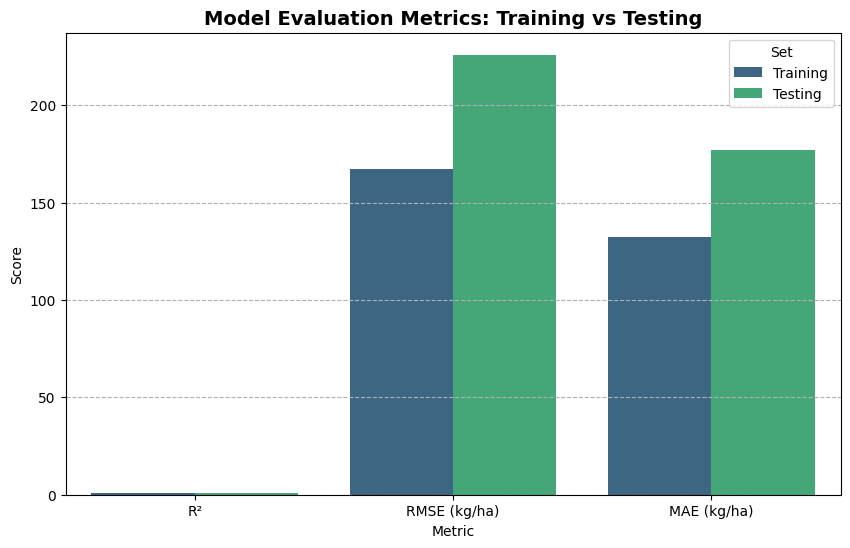

In [80]:
# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Set', palette='viridis')
plt.title('Model Evaluation Metrics: Training vs Testing', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--')
plt.show()

In [81]:
# CROSS-VALIDATION
cv_scores = cross_val_score(lgbm_model, X, y, cv=5, scoring='r2')

# Create a DataFrame for cross-validation scores
cv_results_df = pd.DataFrame({
    'Fold': range(1, len(cv_scores) + 1),
    'R² Score': cv_scores
})

print("\nCross-Validation R² Scores:")
display(cv_results_df) # Display the DataFrame

print(f"Average CV R²: {cv_scores.mean():.4f}")


Cross-Validation R² Scores:


,Fold,R² Score
0,1,0.819522
1,2,0.805307
2,3,0.795335
3,4,0.803196
4,5,0.822283


Average CV R²: 0.8091


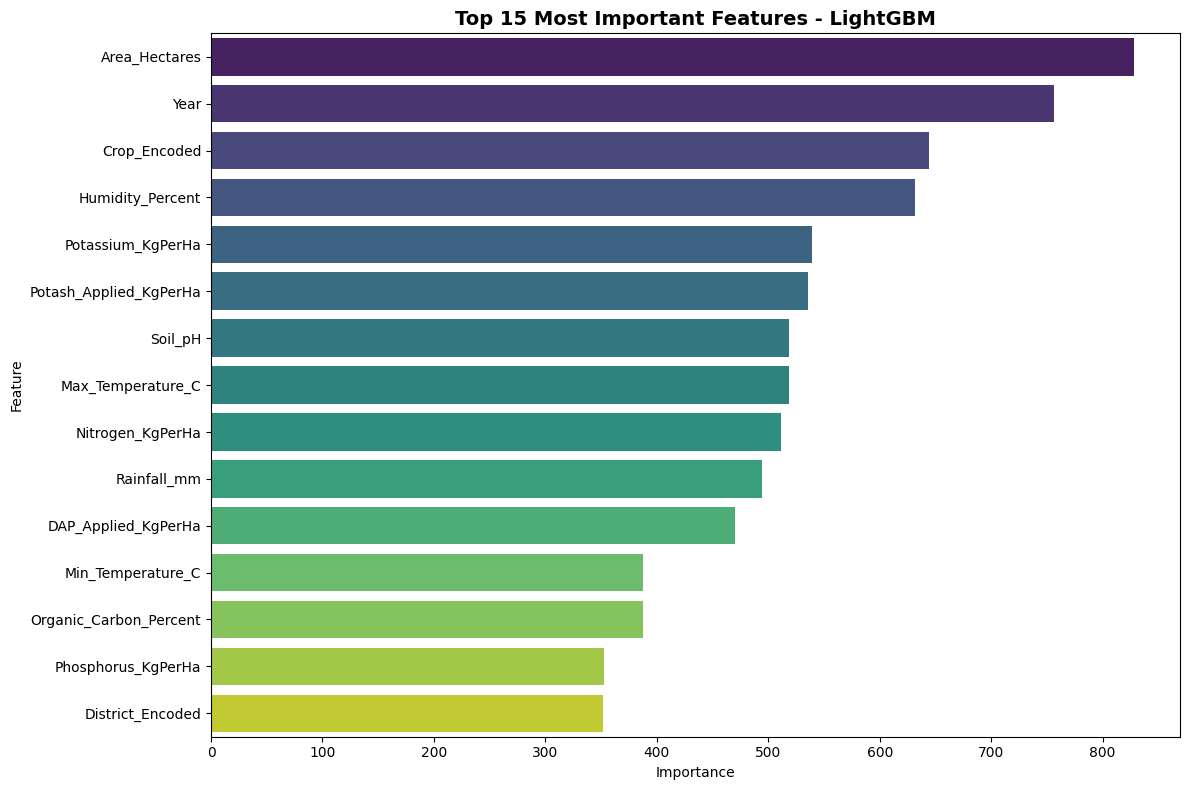

In [82]:
# FEATURE IMPORTANCE
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': lgbm_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Most Important Features - LightGBM', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


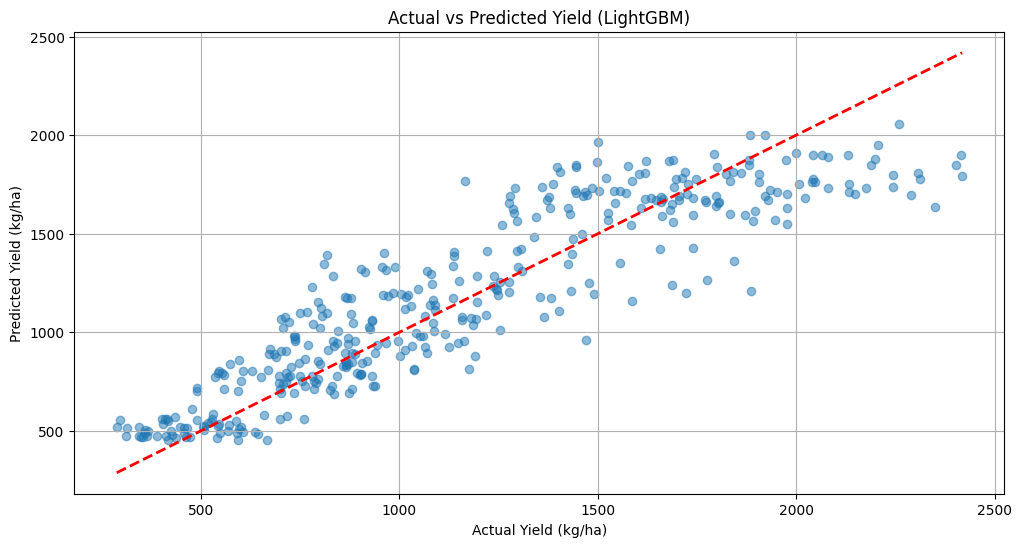

In [ ]:
#PERFORMANCE VISUALS
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Yield (LightGBM)')
plt.grid(True)
plt.show()



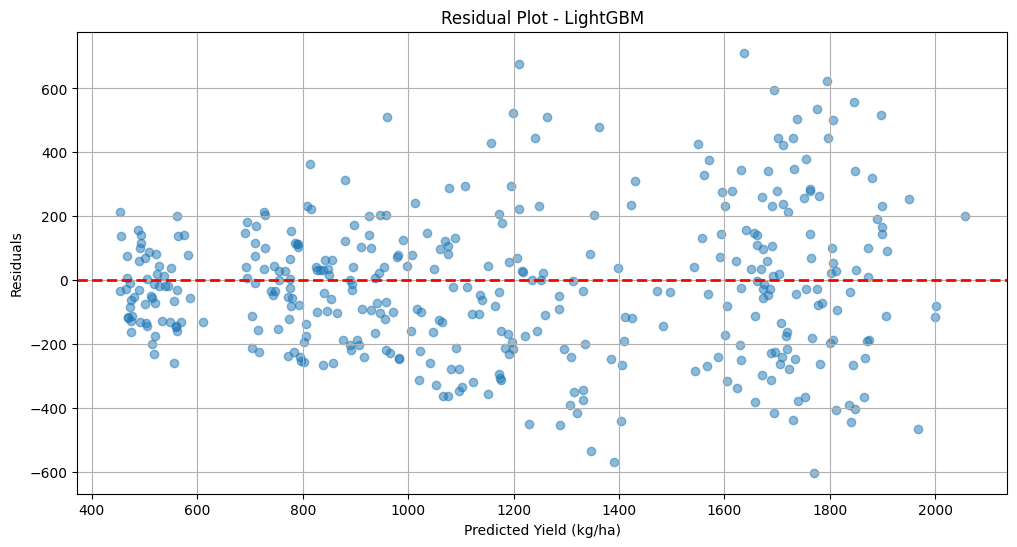

In [ ]:
#residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Yield (kg/ha)')
plt.ylabel('Residuals')
plt.title('Residual Plot - LightGBM')
plt.grid(True)
plt.show()

# Step 8 : Quantitative Analysis


## Train linear regression model

In [92]:
from sklearn.linear_model import LinearRegression

# Instantiate Linear Regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()


Evaluate the performance of the Linear Regression model on the test set and store the metrics (R², RMSE, MAE).


In [93]:
# Predict on the scaled test set
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_r2_lr = r2_score(y_test, y_pred_test_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
test_mae_lr = mean_absolute_error(y_test, y_pred_test_lr)

# Print the evaluation metrics
print("Performance of Linear Regression Model (Test Set):")
print(f"Testing R²: {test_r2_lr:.4f}")
print(f"Testing RMSE: {test_rmse_lr:.2f} kg/ha")
print(f"Testing MAE: {test_mae_lr:.2f} kg/ha")

Performance of Linear Regression Model (Test Set):
Testing R²: 0.4959
Testing RMSE: 372.09 kg/ha
Testing MAE: 309.96 kg/ha


## Train randomforest model
Train a RandomForest Regressor model on the scaled training data.


In [94]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)


Evaluate the performance of the RandomForest model on the test set and store the metrics (R², RMSE, MAE).

In [95]:
# Predict on the scaled test set
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_r2_rf = r2_score(y_test, y_pred_test_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)

# Print the evaluation metrics
print("Performance of RandomForest Model (Test Set):")
print(f"Testing R²: {test_r2_rf:.4f}")
print(f"Testing RMSE: {test_rmse_rf:.2f} kg/ha")
print(f"Testing MAE: {test_mae_rf:.2f} kg/ha")

Performance of RandomForest Model (Test Set):
Testing R²: 0.8155
Testing RMSE: 225.12 kg/ha
Testing MAE: 178.56 kg/ha


## Create comparison table

In [98]:
# Create a dictionary to hold the metrics
performance_comparison_data = {
    'Metric': ['R²', 'RMSE (kg/ha)', 'MAE (kg/ha)'],
    'Linear Regression': [test_r2_lr, test_rmse_lr, test_mae_lr],
    'RandomForest': [test_r2_rf, test_rmse_rf, test_mae_rf],
    'LightGBM (Optuna)': [test_r2_op, test_rmse_op, test_mae_op]
}

# Create a pandas DataFrame from the dictionary
performance_comparison_df = pd.DataFrame(performance_comparison_data)

In [99]:
print("Model Performance Comparison (Test Set):")
display(performance_comparison_df)

Model Performance Comparison (Test Set):


,Metric,Linear Regression,RandomForest,LightGBM (Optuna)
0,R²,0.495868,0.815459,0.820306
1,RMSE (kg/ha),372.086768,225.122363,222.146243
2,MAE (kg/ha),309.964010,178.555443,173.615373


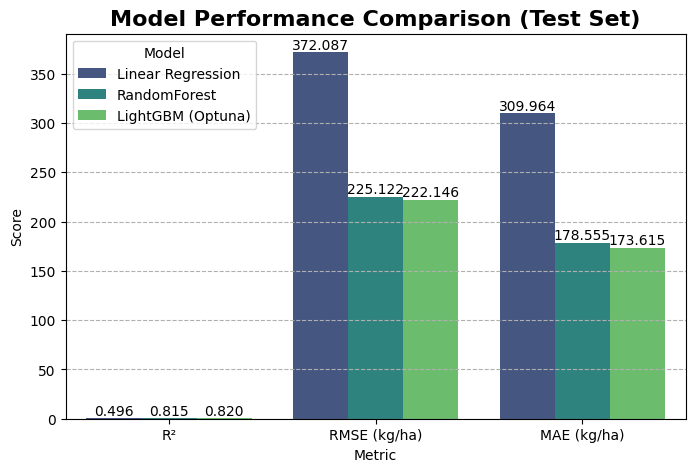

In [106]:
# Melt the DataFrame for easier plotting
performance_comparison_melted = performance_comparison_df.melt(
    id_vars='Metric', var_name='Model', value_name='Score'
)

# Plot the comparison using a bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=performance_comparison_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Model Performance Comparison (Test Set)', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f') # Format the labels to 3 decimal places

plt.show()

#Step 8 : Error analysis




###Investigate the characteristics of the data points with the largest residuals (both positive and negative).

Combine test features, actual, and predicted values into a DataFrame, calculate residuals, and display the points with the largest absolute residuals.

In [71]:
# Create a DataFrame with test features, actual, and predicted values
error_analysis_df = X_test.copy()
error_analysis_df['Actual_Yield'] = y_test
error_analysis_df['Predicted_Yield'] = y_pred_test

# Calculate residuals
error_analysis_df['Residuals'] = error_analysis_df['Actual_Yield'] - error_analysis_df['Predicted_Yield']

# Sort by absolute residuals in descending order
error_analysis_df['Abs_Residuals'] = abs(error_analysis_df['Residuals'])
error_analysis_df_sorted = error_analysis_df.sort_values('Abs_Residuals', ascending=False)

# Display the top 20 data points with the largest residuals
print("Data Points with Largest Residuals:")
display(error_analysis_df_sorted.head(20))

Data Points with Largest Residuals:


,Year,Crop_Encoded,Season_Encoded,District_Encoded,Area_Hectares,Rainfall_mm,Min_Temperature_C,Max_Temperature_C,Humidity_Percent,Soil_pH,...,Urea_Applied_KgPerHa,DAP_Applied_KgPerHa,Potash_Applied_KgPerHa,Temp_Range,NPK_Total,Fertilizer_Total,Actual_Yield,Predicted_Yield,Residuals,Abs_Residuals
1356,2022,3,0,12,3259,833.06,23.26,32.53,75.30,7.42,...,141.14,40.66,34.96,9.27,389.65,216.76,1886,1224.291771,661.708229,661.708229
889,2019,0,1,25,734,295.65,15.54,27.65,48.43,7.33,...,63.56,60.49,77.96,12.11,484.45,202.01,2349,1712.278550,636.721450,636.721450
1453,2022,0,1,13,3710,257.22,14.25,25.48,56.98,6.71,...,92.36,32.84,58.87,11.23,536.54,184.07,2418,1789.369003,628.630997,628.630997
1270,2021,0,1,22,2689,81.26,17.83,28.18,64.67,7.54,...,144.10,65.79,27.74,10.35,557.04,237.63,2289,1682.927201,606.072799,606.072799
985,2020,3,0,25,2124,598.96,24.12,32.18,84.82,6.63,...,134.74,57.05,52.15,8.06,403.04,243.94,1723,1154.403748,568.596252,568.596252
420,2017,0,0,4,1184,400.91,20.39,36.10,74.61,6.08,...,128.49,44.00,27.85,15.71,597.93,200.34,1166,1731.319814,-565.319814,565.319814
1360,2022,3,0,16,5796,496.82,22.61,35.80,75.90,6.90,...,127.92,91.00,43.38,13.19,350.58,262.30,1842,1290.370529,551.629471,551.629471
617,2018,0,0,9,3228,460.52,22.31,37.91,79.24,7.92,...,134.39,77.11,38.27,15.60,597.86,249.77,2243,1691.444319,551.555681,551.555681
1870,2024,4,1,14,1711,112.45,12.77,25.25,49.97,6.74,...,57.71,37.60,73.45,12.48,345.79,168.76,1470,938.368080,531.631920,531.631920
1742,2024,3,0,14,1921,437.80,21.76,34.58,72.70,6.09,...,68.34,68.17,48.68,12.82,503.29,185.19,1774,1257.995206,516.004794,516.004794


#Step 9: Ablation analysis

### Identify the least important features based on the feature importance plot.




In [61]:
# Identify the least important features
least_important_features = feature_importance.tail(3)

print("Least Important Features:")
print(least_important_features)

Least Important Features:
                    Feature  Importance
14        Soil_Type_Encoded          91
15  Irrigation_Type_Encoded          24
2            Season_Encoded           1


Retrain the LightGBM model with subsets of features, progressively removing the least important ones.

In [62]:
# 1. Remove the least important feature ('Season_Encoded')
features_ablation_1 = feature_cols.copy()
least_important_feature_1 = least_important_features.iloc[0]['Feature']
features_ablation_1.remove(least_important_feature_1)
print(f"Features for Ablation Model 1 (removed {least_important_feature_1}):")
print(features_ablation_1)

# 2. Create new datasets with selected features
X_ablation_1 = df_processed[features_ablation_1]
y_ablation_1 = df_processed['Yield_KgPerHa'] # Target remains the same

# Split the new datasets
X_train_ablation_1, X_test_ablation_1, y_train_ablation_1, y_test_ablation_1 = train_test_split(
    X_ablation_1, y_ablation_1, test_size=0.2, random_state=42
)

# 3. Scale the new datasets using the previously fitted scaler
# Note: We refit the scaler on the ablated training data to avoid data leakage
scaler_ablation_1 = StandardScaler()
X_train_scaled_ablation_1 = scaler_ablation_1.fit_transform(X_train_ablation_1)
X_test_scaled_ablation_1 = scaler_ablation_1.transform(X_test_ablation_1)

# 4. Instantiate a new LGBMRegressor model with Optuna best parameters
# Using the same best_params from the Optuna tuning step
lgbm_model_ablation_1 = LGBMRegressor(
    **best_params,
    random_state=42,
    verbose=-1,
    force_col_wise=True
)

# 5. Train the new ablated model
lgbm_model_ablation_1.fit(X_train_scaled_ablation_1, y_train_ablation_1)

# Evaluate the first ablated model
y_pred_test_ablation_1 = lgbm_model_ablation_1.predict(X_test_scaled_ablation_1)
test_r2_ablation_1 = r2_score(y_test_ablation_1, y_pred_test_ablation_1)
test_rmse_ablation_1 = np.sqrt(mean_squared_error(y_test_ablation_1, y_pred_test_ablation_1))
test_mae_ablation_1 = mean_absolute_error(y_test_ablation_1, y_pred_test_ablation_1)

print(f"\nPerformance of Ablation Model 1 (removed {least_important_feature_1}):")
print(f"Testing R²: {test_r2_ablation_1:.4f}")
print(f"Testing RMSE: {test_rmse_ablation_1:.2f} kg/ha")
print(f"Testing MAE: {test_mae_ablation_1:.2f} kg/ha")

# Store results for comparison later
ablation_results = {
    'Original Model': {'R2': test_r2_op, 'RMSE': test_rmse_op, 'MAE': test_mae_op},
    f'Ablation 1 (Removed {least_important_feature_1})': {'R2': test_r2_ablation_1, 'RMSE': test_rmse_ablation_1, 'MAE': test_mae_ablation_1}
}

Features for Ablation Model 1 (removed Soil_Type_Encoded):
['Year', 'Crop_Encoded', 'Season_Encoded', 'District_Encoded', 'Area_Hectares', 'Rainfall_mm', 'Min_Temperature_C', 'Max_Temperature_C', 'Humidity_Percent', 'Soil_pH', 'Organic_Carbon_Percent', 'Nitrogen_KgPerHa', 'Phosphorus_KgPerHa', 'Potassium_KgPerHa', 'Irrigation_Type_Encoded', 'Pest_Incidence_Score', 'Urea_Applied_KgPerHa', 'DAP_Applied_KgPerHa', 'Potash_Applied_KgPerHa', 'Temp_Range', 'NPK_Total', 'Fertilizer_Total']

Performance of Ablation Model 1 (removed Soil_Type_Encoded):
Testing R²: 0.8204
Testing RMSE: 222.07 kg/ha
Testing MAE: 174.02 kg/ha


In [63]:
# 1. Remove the second least important feature ('Irrigation_Type_Encoded')
features_ablation_2 = features_ablation_1.copy() # Start from features used in ablation_1
least_important_feature_2 = least_important_features.iloc[1]['Feature']
features_ablation_2.remove(least_important_feature_2)
print(f"\nFeatures for Ablation Model 2 (removed {least_important_feature_2}):")
print(features_ablation_2)

# 2. Create new datasets with selected features
X_ablation_2 = df_processed[features_ablation_2]
y_ablation_2 = df_processed['Yield_KgPerHa']

# Split the new datasets
X_train_ablation_2, X_test_ablation_2, y_train_ablation_2, y_test_ablation_2 = train_test_split(
    X_ablation_2, y_ablation_2, test_size=0.2, random_state=42
)

# 3. Scale the new datasets using a new scaler fitted on the ablated training data
scaler_ablation_2 = StandardScaler()
X_train_scaled_ablation_2 = scaler_ablation_2.fit_transform(X_train_ablation_2)
X_test_scaled_ablation_2 = scaler_ablation_2.transform(X_test_ablation_2)

# 4. Instantiate a new LGBMRegressor model with Optuna best parameters
lgbm_model_ablation_2 = LGBMRegressor(
    **best_params,
    random_state=42,
    verbose=-1,
    force_col_wise=True
)

# 5. Train the new ablated model
lgbm_model_ablation_2.fit(X_train_scaled_ablation_2, y_train_ablation_2)

# Evaluate the second ablated model
y_pred_test_ablation_2 = lgbm_model_ablation_2.predict(X_test_scaled_ablation_2)
test_r2_ablation_2 = r2_score(y_test_ablation_2, y_pred_test_ablation_2)
test_rmse_ablation_2 = np.sqrt(mean_squared_error(y_test_ablation_2, y_pred_test_ablation_2))
test_mae_ablation_2 = mean_absolute_error(y_test_ablation_2, y_pred_test_ablation_2)

print(f"\nPerformance of Ablation Model 2 (removed {least_important_feature_2}):")
print(f"Testing R²: {test_r2_ablation_2:.4f}")
print(f"Testing RMSE: {test_rmse_ablation_2:.2f} kg/ha")
print(f"Testing MAE: {test_mae_ablation_2:.2f} kg/ha")

# Update ablation results
ablation_results[f'Ablation 2 (Removed {least_important_feature_2})'] = {
    'R2': test_r2_ablation_2, 'RMSE': test_rmse_ablation_2, 'MAE': test_mae_ablation_2
}


Features for Ablation Model 2 (removed Irrigation_Type_Encoded):
['Year', 'Crop_Encoded', 'Season_Encoded', 'District_Encoded', 'Area_Hectares', 'Rainfall_mm', 'Min_Temperature_C', 'Max_Temperature_C', 'Humidity_Percent', 'Soil_pH', 'Organic_Carbon_Percent', 'Nitrogen_KgPerHa', 'Phosphorus_KgPerHa', 'Potassium_KgPerHa', 'Pest_Incidence_Score', 'Urea_Applied_KgPerHa', 'DAP_Applied_KgPerHa', 'Potash_Applied_KgPerHa', 'Temp_Range', 'NPK_Total', 'Fertilizer_Total']

Performance of Ablation Model 2 (removed Irrigation_Type_Encoded):
Testing R²: 0.8207
Testing RMSE: 221.88 kg/ha
Testing MAE: 173.80 kg/ha


In [68]:
# 1. Remove the third least important feature ('Season_Encoded')
features_ablation_3 = features_ablation_2.copy() # Start from features used in ablation_2
least_important_feature_3 = least_important_features.iloc[2]['Feature']
features_ablation_3.remove(least_important_feature_3)
print(f"\nFeatures for Ablation Model 3 (removed {least_important_feature_3}):")
print(features_ablation_3)

# 2. Create new datasets with selected features
X_ablation_3 = df_processed[features_ablation_3]
y_ablation_3 = df_processed['Yield_KgPerHa']

# Split the new datasets
X_train_ablation_3, X_test_ablation_3, y_train_ablation_3, y_test_ablation_3 = train_test_split(
    X_ablation_3, y_ablation_3, test_size=0.2, random_state=42
)

# 3. Scale the new datasets using a new scaler fitted on the ablated training data
scaler_ablation_3 = StandardScaler()
X_train_scaled_ablation_3 = scaler_ablation_3.fit_transform(X_train_ablation_3)
X_test_scaled_ablation_3 = scaler_ablation_3.transform(X_test_ablation_3)

# 4. Instantiate a new LGBMRegressor model with Optuna best parameters
lgbm_model_ablation_3 = LGBMRegressor(
    **best_params,
    random_state=42,
    verbose=-1,
    force_col_wise=True
)

# 5. Train the new ablated model
lgbm_model_ablation_3.fit(X_train_scaled_ablation_3, y_train_ablation_3)

# Evaluate the third ablated model
y_pred_test_ablation_3 = lgbm_model_ablation_3.predict(X_test_scaled_ablation_3)
test_r2_ablation_3 = r2_score(y_test_ablation_3, y_pred_test_ablation_3)
test_rmse_ablation_3 = np.sqrt(mean_squared_error(y_test_ablation_3, y_pred_test_ablation_3))
test_mae_ablation_3 = mean_absolute_error(y_test_ablation_3, y_pred_test_ablation_3)

print(f"\nPerformance of Ablation Model 3 (removed {least_important_feature_3}):")
print(f"Testing R²: {test_r2_ablation_3:.4f}")
print(f"Testing RMSE: {test_rmse_ablation_3:.2f} kg/ha")
print(f"Testing MAE: {test_mae_ablation_3:.2f} kg/ha")



Features for Ablation Model 3 (removed Season_Encoded):
['Year', 'Crop_Encoded', 'District_Encoded', 'Area_Hectares', 'Rainfall_mm', 'Min_Temperature_C', 'Max_Temperature_C', 'Humidity_Percent', 'Soil_pH', 'Organic_Carbon_Percent', 'Nitrogen_KgPerHa', 'Phosphorus_KgPerHa', 'Potassium_KgPerHa', 'Pest_Incidence_Score', 'Urea_Applied_KgPerHa', 'DAP_Applied_KgPerHa', 'Potash_Applied_KgPerHa', 'Temp_Range', 'NPK_Total', 'Fertilizer_Total']

Performance of Ablation Model 3 (removed Season_Encoded):
Testing R²: 0.8206
Testing RMSE: 221.97 kg/ha
Testing MAE: 173.59 kg/ha


In [72]:

# Update ablation results
ablation_results[f'Ablation 3 (Removed {least_important_feature_3})'] = {
    'R2': test_r2_ablation_3, 'RMSE': test_rmse_ablation_3, 'MAE': test_mae_ablation_3
}

# Display the full ablation results
print("\nAblation Study Results:")
ablation_df = pd.DataFrame(ablation_results).T
display(ablation_df)


Ablation Study Results:


,R2,RMSE,MAE
Original Model,0.820306,222.146243,173.615373
Ablation 1 (Removed Soil_Type_Encoded),0.820422,222.074274,174.018047
Ablation 2 (Removed Irrigation_Type_Encoded),0.820742,221.876790,173.799232
Ablation 3 (Removed Season_Encoded),0.820590,221.970816,173.589047


#Step 10: Model Deployment

In [ ]:
# Save artifacts (run after model is trained)
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(lgbm_model, "models/lgbm_model.joblib")

# If you used LabelEncoder objects in a dict called label_encoders:
joblib.dump(label_encoders, "models/label_encoders.joblib")

# Save the FEATURES list used in training (must be exact)
joblib.dump(feature_cols, "models/features_list.joblib")

print("Saved: models/lgbm_model.joblib, models/label_encoders.joblib, models/features_list.joblib")

Saved: models/lgbm_model.joblib, models/label_encoders.joblib, models/features_list.joblib


In [ ]:
from google.colab import files
files.download("models/lgbm_model.joblib")
files.download("models/label_encoders.joblib")
files.download("models/features_list.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Key Takeaways

This project successfully developed and evaluated a LightGBM model for predicting oilseed crop yield in Maharashtra, India. Here are the key takeaways:

*   **Model Performance:** The tuned LightGBM model achieved a good performance on the test set. An **R² of around 0.8203 kg/ha** , an **RMSE of around  222.15  kg/ha**, and an **MAE of about 173.62 kg/ha**. The cross-validation results also indicate reasonable robustness.
*   **Hyperparameter Tuning:** Both RandomizedSearchCV and Optuna were used for hyperparameter tuning. The Optuna-tuned model showed slightly better performance.
*   **Feature Importance:** The feature importance analysis highlighted the most influential factors in predicting yield, such as Area Hectares, Year, Crop Type, and Humidity.
*   **Ablation Study:** The ablation study revealed that the least important features (Soil Type, Irrigation Type, and Season) could potentially be removed with minimal impact on model performance, suggesting opportunities for model simplification.
*   **Error Analysis:** The error analysis identified data points with large residuals, prompting further investigation into potential outliers, missing information, or complex relationships not fully captured by the model.

